# Credit Card Dataset Analysis

In [1]:
import pandas as pd
import numpy as np

## General

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

<AxesSubplot:ylabel='default payment next month'>

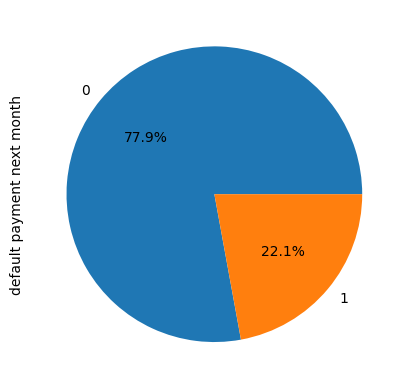

In [2]:
df = pd.read_csv("../Cleaned/Credit-Card/credit-card-clients.csv", skipinitialspace=True)
df.info()
print("target count")
print(df['default payment next month'].value_counts())
df['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## Sex

2    18112
1    11888
Name: SEX, dtype: int64


<AxesSubplot:ylabel='SEX'>

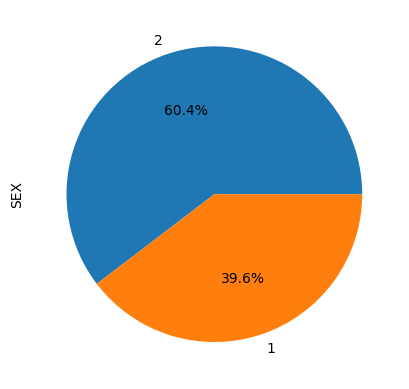

In [3]:
print(df['SEX'].value_counts())
df['SEX'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering sex = 1 (male)

0    9015
1    2873
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

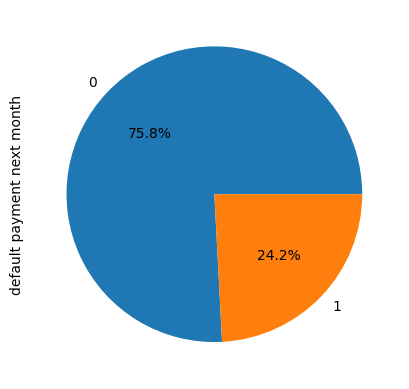

In [4]:
print(df.loc[df['SEX']==1]['default payment next month'].value_counts())
df.loc[df['SEX']==1]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering sex = 2 (female)

0    14349
1     3763
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

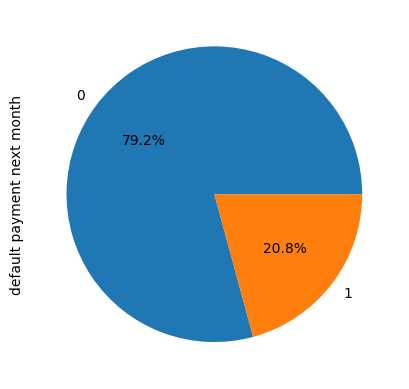

In [5]:
print(df.loc[df['SEX']==2]['default payment next month'].value_counts())
df.loc[df['SEX']==2]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = 1

let s1 = 2

In [6]:
# p(y+|s0) -> p(1|1)
p1 = len(df.loc[(df['SEX']==1) & (df['default payment next month']==1)]) / len(df.loc[df['SEX']==1])
#print(p1)
# p(y-|s1) -> p(0|2)
p2 = len(df.loc[(df['SEX']==2) & (df['default payment next month']==0)]) / len(df.loc[df['SEX']==2])
#print(p2)
# p(y+|s1) -> p(1|2)
p3 = len(df.loc[(df['SEX']==2) & (df['default payment next month']==1)]) / len(df.loc[df['SEX']==2])
#print(p3)
# p(y-|s0) -> p(0|1)
p4 = len(df.loc[(df['SEX']==1) & (df['default payment next month']==0)]) / len(df.loc[df['SEX']==1])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.215


In [7]:
#OR for s0 = Female
oddsratio = (p3 * p4) / (p1 * p2)
print("OR: {:.3f}".format(oddsratio))

OR: 0.823


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = 1

let s1 = 2

In [8]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.163


### Proxies

Most of the proxies found for sex include (a combination of):
 - 

Best model (min depth) found with a node at depth 3 with 9 samples.

	** PAY_2 <= -0.5 , BILL_AMT4 <= -0.5 , PAY_AMT6 > 35109.5 ,  #impurity: 0.0, #samples: 9.

Best model (max sample) found with 78 sample in a node at depth 10.

    ** AGE <= 28.5 , LIMIT_BAL > 25000.0 , PAY_AMT3 <= 2284.5 , AGE <= 24.5 , BILL_AMT4 > 21427.5 , LIMIT_BAL > 55000.0 , PAY_AMT6 <= 1519.5 , PAY_AMT5 > 117.0 , PAY_0 > -0.5 , PAY_3 <= 1.0 ,  #impurity: 0.0, #samples: 78.
    
        

For proxy: PAY_2 <= -0.5 & BILL_AMT4 <= -0.5 & PAY_AMT6 > 35109.5

2    9
Name: SEX, dtype: int64


<AxesSubplot:ylabel='SEX'>

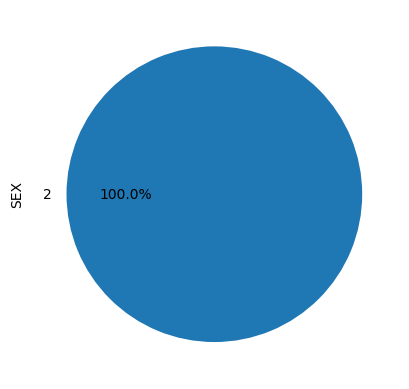

In [9]:
print(df.loc[(df['PAY_2']<=-0.5) & (df['BILL_AMT4']<=-0.5) & (df['PAY_AMT6']>35109.5)]['SEX'].value_counts())
df.loc[(df['PAY_2']<=-0.5) & (df['BILL_AMT4']<=-0.5) & (df['PAY_AMT6']>35109.5)]['SEX'].value_counts().plot(kind='pie',autopct='%1.1f%%')

0    8
1    1
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

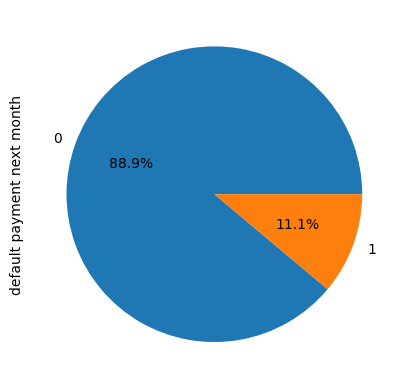

In [10]:
print(df.loc[(df['PAY_2']<=-0.5) & (df['BILL_AMT4']<=-0.5) & (df['PAY_AMT6']>35109.5)]['default payment next month'].value_counts())
df.loc[(df['PAY_2']<=-0.5) & (df['BILL_AMT4']<=-0.5) & (df['PAY_AMT6']>35109.5)]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [11]:
# p(y+|s0) -> p(1|Proxy)
p1 = len(df.loc[(df['PAY_2']<=-0.5) & (df['BILL_AMT4']<=-0.5) & (df['PAY_AMT6']>35109.5) & (df['default payment next month']==1)]) / len(df.loc[(df['PAY_2']<=-0.5) & (df['BILL_AMT4']<=-0.5) & (df['PAY_AMT6']>35109.5)])
#print(p1)
# p(y-|s1) -> p(0|!Proxy)
p2 = len(df.loc[((df['PAY_2']>-0.5) | (df['BILL_AMT4']>-0.5) | (df['PAY_AMT6']<=35109.5)) & (df['default payment next month']==0)]) / len(df.loc[((df['PAY_2']>-0.5) | (df['BILL_AMT4']>-0.5) | (df['PAY_AMT6']<=35109.5))])
#print(p2)
# p(y+|s1) -> p(1|!Proxy)
p3 = len(df.loc[((df['PAY_2']>-0.5) | (df['BILL_AMT4']>-0.5) | (df['PAY_AMT6']<=35109.5)) & (df['default payment next month']==1)]) / len(df.loc[((df['PAY_2']>-0.5) | (df['BILL_AMT4']>-0.5) | (df['PAY_AMT6']<=35109.5))])
#print(p3)
# p(y-|s0) -> p(0|Proxy)
p4 = len(df.loc[(df['PAY_2']<=-0.5) & (df['BILL_AMT4']<=-0.5) & (df['PAY_AMT6']>35109.5) & (df['default payment next month']==0)]) / len(df.loc[(df['PAY_2']<=-0.5) & (df['BILL_AMT4']<=-0.5) & (df['PAY_AMT6']>35109.5)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.440


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [12]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.502


For proxy: AGE <= 24.5 & LIMIT_BAL > 55000.0 & PAY_AMT3 <= 2284.5 & BILL_AMT4 > 21427.5 & PAY_AMT6 <= 1519.5 & PAY_AMT5 > 117.0 & PAY_0 > -0.5 & PAY_3 <= 1.0

2    78
Name: SEX, dtype: int64


<AxesSubplot:ylabel='SEX'>

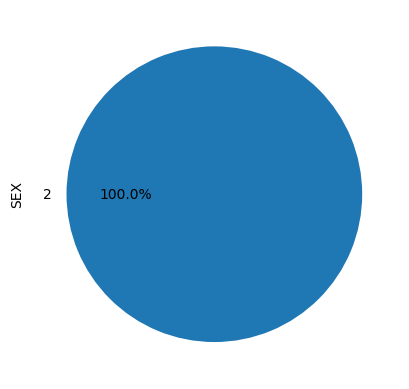

In [13]:
print(df.loc[(df['AGE']<=24.5) & (df['LIMIT_BAL']>55000.0) & (df['PAY_AMT3']<=2284.5) & (df['BILL_AMT4']>21427.5) & (df['PAY_AMT6']<=1519.5) & (df['PAY_AMT5']>117.0) & (df['PAY_0']>-0.5) & (df['PAY_3']<=1.0)]['SEX'].value_counts())
df.loc[(df['AGE']<=24.5) & (df['LIMIT_BAL']>55000.0) & (df['PAY_AMT3']<=2284.5) & (df['BILL_AMT4']>21427.5) & (df['PAY_AMT6']<=1519.5) & (df['PAY_AMT5']>117.0) & (df['PAY_0']>-0.5) & (df['PAY_3']<=1.0)]['SEX'].value_counts().plot(kind='pie',autopct='%1.1f%%')

0    66
1    12
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

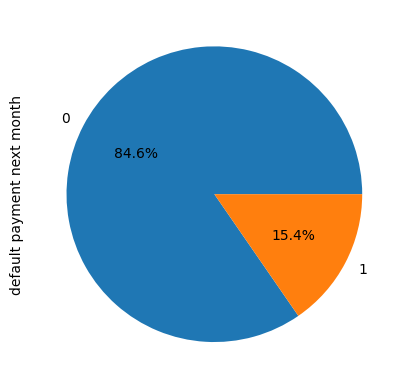

In [14]:
print(df.loc[(df['AGE']<=24.5) & (df['LIMIT_BAL']>55000.0) & (df['PAY_AMT3']<=2284.5) & (df['BILL_AMT4']>21427.5) & (df['PAY_AMT6']<=1519.5) & (df['PAY_AMT5']>117.0) & (df['PAY_0']>-0.5) & (df['PAY_3']<=1.0)]['default payment next month'].value_counts())
df.loc[(df['AGE']<=24.5) & (df['LIMIT_BAL']>55000.0) & (df['PAY_AMT3']<=2284.5) & (df['BILL_AMT4']>21427.5) & (df['PAY_AMT6']<=1519.5) & (df['PAY_AMT5']>117.0) & (df['PAY_0']>-0.5) & (df['PAY_3']<=1.0)]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = o

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [15]:
# p(y+|s0) -> p(1|Proxy)
p1 = len(df.loc[(df['AGE']<=24.5) & (df['LIMIT_BAL']>55000.0) & (df['PAY_AMT3']<=2284.5) & (df['BILL_AMT4']>21427.5) & (df['PAY_AMT6']<=1519.5) & (df['PAY_AMT5']>117.0) & (df['PAY_0']>-0.5) & (df['PAY_3']<=1.0) & (df['default payment next month']==1)]) / len(df.loc[(df['AGE']<=24.5) & (df['LIMIT_BAL']>55000.0) & (df['PAY_AMT3']<=2284.5) & (df['BILL_AMT4']>21427.5) & (df['PAY_AMT6']<=1519.5) & (df['PAY_AMT5']>117.0) & (df['PAY_0']>-0.5) & (df['PAY_3']<=1.0)])
#print(p1)
# p(y-|s1) -> p(0|!Proxy)
p2 = len(df.loc[((df['AGE']>24.5) | (df['LIMIT_BAL']<=55000.0) | (df['PAY_AMT3']>2284.5) | (df['BILL_AMT4']<=21427.5) | (df['PAY_AMT6']>1519.5) | (df['PAY_AMT5']<=117.0) | (df['PAY_0']<=-0.5) | (df['PAY_3']>1.0)) & (df['default payment next month']==0)]) / len(df.loc[((df['AGE']>24.5) | (df['LIMIT_BAL']<=55000.0) | (df['PAY_AMT3']>2284.5) | (df['BILL_AMT4']<=21427.5) | (df['PAY_AMT6']>1519.5) | (df['PAY_AMT5']<=117.0) | (df['PAY_0']<=-0.5) | (df['PAY_3']>1.0))])
#print(p2)
# p(y+|s1) -> p(1|!Proxy)
p3 = len(df.loc[((df['AGE']>24.5) | (df['LIMIT_BAL']<=55000.0) | (df['PAY_AMT3']>2284.5) | (df['BILL_AMT4']<=21427.5) | (df['PAY_AMT6']>1519.5) | (df['PAY_AMT5']<=117.0) | (df['PAY_0']<=-0.5) | (df['PAY_3']>1.0)) & (df['default payment next month']==1)]) / len(df.loc[((df['AGE']>24.5) | (df['LIMIT_BAL']<=55000.0) | (df['PAY_AMT3']>2284.5) | (df['BILL_AMT4']<=21427.5) | (df['PAY_AMT6']>1519.5) | (df['PAY_AMT5']<=117.0) | (df['PAY_0']<=-0.5) | (df['PAY_3']>1.0))])
#print(p3)
# p(y-|s0) -> p(0|Proxy)
p4 = len(df.loc[(df['AGE']<=24.5) & (df['LIMIT_BAL']>55000.0) & (df['PAY_AMT3']<=2284.5) & (df['BILL_AMT4']>21427.5) & (df['PAY_AMT6']<=1519.5) & (df['PAY_AMT5']>117.0) & (df['PAY_0']>-0.5) & (df['PAY_3']<=1.0) & (df['default payment next month']==0)]) / len(df.loc[(df['AGE']<=24.5) & (df['LIMIT_BAL']>55000.0) & (df['PAY_AMT3']<=2284.5) & (df['BILL_AMT4']>21427.5) & (df['PAY_AMT6']<=1519.5) & (df['PAY_AMT5']>117.0) & (df['PAY_0']>-0.5) & (df['PAY_3']<=1.0)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.639


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [16]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.695


## EDUCATION

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


<AxesSubplot:ylabel='EDUCATION'>

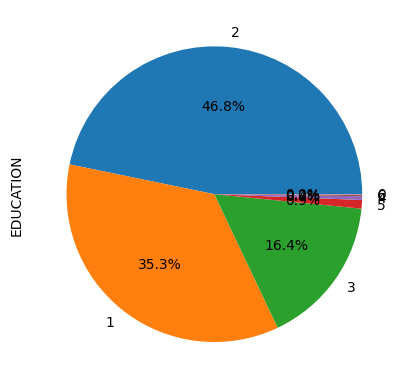

In [17]:
print(df['EDUCATION'].value_counts())
df['EDUCATION'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering education = 0

0    14
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

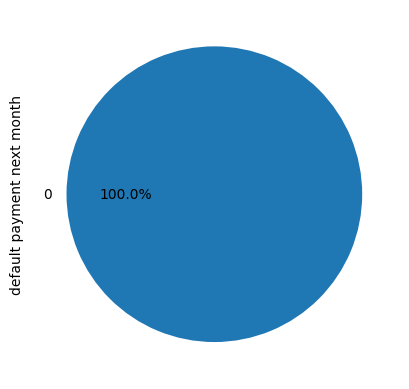

In [18]:
print(df.loc[df['EDUCATION']==0]['default payment next month'].value_counts())
df.loc[df['EDUCATION']==0]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering education = 1

0    8549
1    2036
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

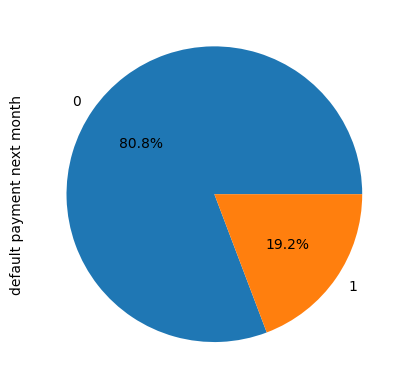

In [19]:
print(df.loc[df['EDUCATION']==1]['default payment next month'].value_counts())
df.loc[df['EDUCATION']==1]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering education = 2 (university)

0    10700
1     3330
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

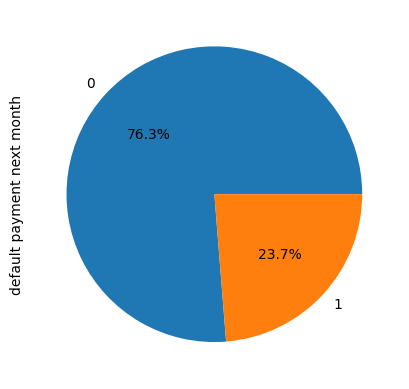

In [20]:
print(df.loc[df['EDUCATION']==2]['default payment next month'].value_counts())
df.loc[df['EDUCATION']==2]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering education = 3

0    3680
1    1237
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

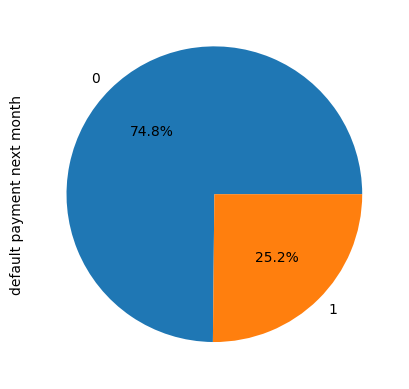

In [21]:
print(df.loc[df['EDUCATION']==3]['default payment next month'].value_counts())
df.loc[df['EDUCATION']==3]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering education = 4

0    116
1      7
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

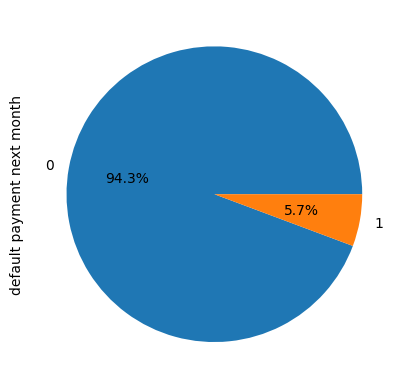

In [22]:
print(df.loc[df['EDUCATION']==4]['default payment next month'].value_counts())
df.loc[df['EDUCATION']==4]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering education = 5

0    262
1     18
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

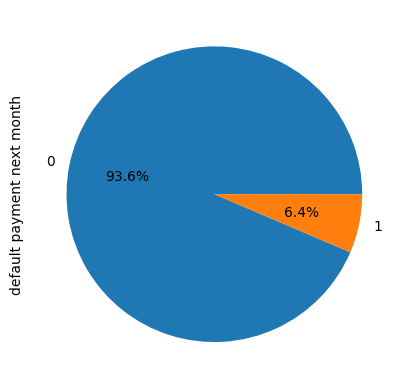

In [23]:
print(df.loc[df['EDUCATION']==5]['default payment next month'].value_counts())
df.loc[df['EDUCATION']==5]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering education = 6

0    43
1     8
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

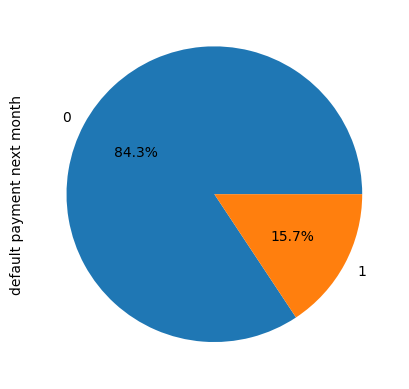

In [24]:
print(df.loc[df['EDUCATION']==6]['default payment next month'].value_counts())
df.loc[df['EDUCATION']==6]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = 0

let s1 = not 0

In [26]:
# p(y+|s0) -> p(1|0)
p1 = len(df.loc[(df['EDUCATION']==0) & (df['default payment next month']==1)]) / len(df.loc[df['EDUCATION']==0])
#print(p1)
# p(y-|s1) -> p(0|!0)
p2 = len(df.loc[(df['EDUCATION']!=0) & (df['default payment next month']==0)]) / len(df.loc[df['EDUCATION']!=0])
#print(p2)
# p(y+|s1) -> p(1|!0)
p3 = len(df.loc[(df['EDUCATION']!=0) & (df['default payment next month']==1)]) / len(df.loc[df['EDUCATION']!=0])
#print(p3)
# p(y-|s0) -> p(0|0)
p4 = len(df.loc[(df['EDUCATION']==0) & (df['default payment next month']==0)]) / len(df.loc[df['EDUCATION']==0])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.000


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = 0

let s1 = not 0

In [27]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.000


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = 1

let s1 = not 1

In [28]:
# p(y+|s0) -> p(1|1)
p1 = len(df.loc[(df['EDUCATION']==1) & (df['default payment next month']==1)]) / len(df.loc[df['EDUCATION']==1])
#print(p1)
# p(y-|s1) -> p(0|!1)
p2 = len(df.loc[(df['EDUCATION']!=1) & (df['default payment next month']==0)]) / len(df.loc[df['EDUCATION']!=1])
#print(p2)
# p(y+|s1) -> p(1|!1)
p3 = len(df.loc[(df['EDUCATION']!=1) & (df['default payment next month']==1)]) / len(df.loc[df['EDUCATION']!=1])
#print(p3)
# p(y-|s0) -> p(0|1)
p4 = len(df.loc[(df['EDUCATION']==1) & (df['default payment next month']==0)]) / len(df.loc[df['EDUCATION']==1])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.767


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = 1

let s1 = not 1

In [29]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.812


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = 2

let s1 = not 2

In [30]:
# p(y+|s0) -> p(1|2)
p1 = len(df.loc[(df['EDUCATION']==2) & (df['default payment next month']==1)]) / len(df.loc[df['EDUCATION']==2])
#print(p1)
# p(y-|s1) -> p(0|!2)
p2 = len(df.loc[(df['EDUCATION']!=2) & (df['default payment next month']==0)]) / len(df.loc[df['EDUCATION']!=2])
#print(p2)
# p(y+|s1) -> p(1|!2)
p3 = len(df.loc[(df['EDUCATION']!=2) & (df['default payment next month']==1)]) / len(df.loc[df['EDUCATION']!=2])
#print(p3)
# p(y-|s0) -> p(0|2)
p4 = len(df.loc[(df['EDUCATION']==2) & (df['default payment next month']==0)]) / len(df.loc[df['EDUCATION']==2])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.192


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = 2

let s1 = not 2

In [31]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.147


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = 3

let s1 = not 3

In [32]:
# p(y+|s0) -> p(1|3)
p1 = len(df.loc[(df['EDUCATION']==3) & (df['default payment next month']==1)]) / len(df.loc[df['EDUCATION']==3])
#print(p1)
# p(y-|s1) -> p(0|!3)
p2 = len(df.loc[(df['EDUCATION']!=3) & (df['default payment next month']==0)]) / len(df.loc[df['EDUCATION']!=3])
#print(p2)
# p(y+|s1) -> p(1|!3)
p3 = len(df.loc[(df['EDUCATION']!=3) & (df['default payment next month']==1)]) / len(df.loc[df['EDUCATION']!=3])
#print(p3)
# p(y-|s0) -> p(0|3)
p4 = len(df.loc[(df['EDUCATION']==3) & (df['default payment next month']==0)]) / len(df.loc[df['EDUCATION']==3])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.226


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = 3

let s1 = not 3

In [33]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.169


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = 4

let s1 = not 4

In [34]:
# p(y+|s0) -> p(1|4)
p1 = len(df.loc[(df['EDUCATION']==4) & (df['default payment next month']==1)]) / len(df.loc[df['EDUCATION']==4])
#print(p1)
# p(y-|s1) -> p(0|!4)
p2 = len(df.loc[(df['EDUCATION']!=4) & (df['default payment next month']==0)]) / len(df.loc[df['EDUCATION']!=4])
#print(p2)
# p(y+|s1) -> p(1|!4)
p3 = len(df.loc[(df['EDUCATION']!=4) & (df['default payment next month']==1)]) / len(df.loc[df['EDUCATION']!=4])
#print(p3)
# p(y-|s0) -> p(0|4)
p4 = len(df.loc[(df['EDUCATION']==4) & (df['default payment next month']==0)]) / len(df.loc[df['EDUCATION']==4])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.212


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = 4

let s1 = not 4

In [35]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.256


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = 5

let s1 = not 5

In [37]:
# p(y+|s0) -> p(1|5)
p1 = len(df.loc[(df['EDUCATION']==5) & (df['default payment next month']==1)]) / len(df.loc[df['EDUCATION']==5])
#print(p1)
# p(y-|s1) -> p(0|!5)
p2 = len(df.loc[(df['EDUCATION']!=5) & (df['default payment next month']==0)]) / len(df.loc[df['EDUCATION']!=5])
#print(p2)
# p(y+|s1) -> p(1|!5)
p3 = len(df.loc[(df['EDUCATION']!=5) & (df['default payment next month']==1)]) / len(df.loc[df['EDUCATION']!=5])
#print(p3)
# p(y-|s0) -> p(0|5)
p4 = len(df.loc[(df['EDUCATION']==5) & (df['default payment next month']==0)]) / len(df.loc[df['EDUCATION']==5])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.240


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = 5

let s1 = not 5

In [38]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.289


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = 6

let s1 = not 6

In [39]:
# p(y+|s0) -> p(1|6)
p1 = len(df.loc[(df['EDUCATION']==6) & (df['default payment next month']==1)]) / len(df.loc[df['EDUCATION']==6])
#print(p1)
# p(y-|s1) -> p(0|!6)
p2 = len(df.loc[(df['EDUCATION']!=6) & (df['default payment next month']==0)]) / len(df.loc[df['EDUCATION']!=6])
#print(p2)
# p(y+|s1) -> p(1|!6)
p3 = len(df.loc[(df['EDUCATION']!=6) & (df['default payment next month']==1)]) / len(df.loc[df['EDUCATION']!=6])
#print(p3)
# p(y-|s0) -> p(0|6)
p4 = len(df.loc[(df['EDUCATION']==6) & (df['default payment next month']==0)]) / len(df.loc[df['EDUCATION']==6])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.655


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = 6

let s1 = not 6

In [40]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.709


### Proxies

Most of the proxies found for race include (a combination of):
 - 


Best model (min depth) found with a node at depth 4 with 8 samples.

	** PAY_4 <= -0.5 , PAY_3 > -0.5 , AGE <= 44.5 , PAY_AMT6 > 99334.0 ,  #impurity: 0.0, #samples: 8.

Best model (max sample) found with 39 sample in a node at depth 8.

    ** PAY_5 <= -0.5 , AGE <= 40.5 , PAY_2 <= -0.5 , PAY_AMT3 > 3815.5 , BILL_AMT5 > 36430.0 , BILL_AMT1 <= 34472.5 , PAY_AMT5 <= 34062.5 , PAY_AMT1 > 1475.0 ,  #impurity: 0.0, #samples: 39.



For proxy: PAY_4 <= -0.5 & PAY_3 > -0.5 & AGE <= 44.5 & PAY_AMT6 > 99334.0

1    8
Name: EDUCATION, dtype: int64


<AxesSubplot:ylabel='EDUCATION'>

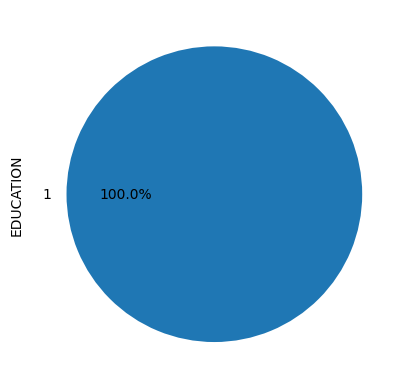

In [41]:
print(df.loc[(df['PAY_4']<=-0.5) & (df['PAY_3']>-0.5) & (df['AGE']<=44.5) & (df['PAY_AMT6']>99334.0)]['EDUCATION'].value_counts())
df.loc[(df['PAY_4']<=-0.5) & (df['PAY_3']>-0.5) & (df['AGE']<=44.5) & (df['PAY_AMT6']>99334.0)]['EDUCATION'].value_counts().plot(kind='pie',autopct='%1.1f%%')

0    8
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

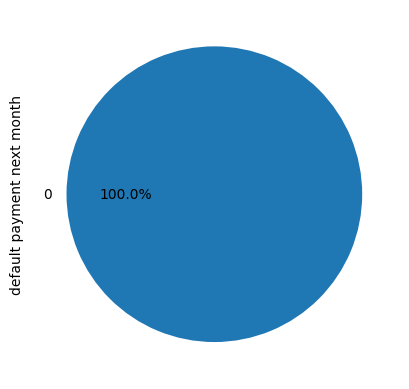

In [42]:
print(df.loc[(df['PAY_4']<=-0.5) & (df['PAY_3']>-0.5) & (df['AGE']<=44.5) & (df['PAY_AMT6']>99334.0)]['default payment next month'].value_counts())
df.loc[(df['PAY_4']<=-0.5) & (df['PAY_3']>-0.5) & (df['AGE']<=44.5) & (df['PAY_AMT6']>99334.0)]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [43]:
# p(y+|s0) -> p(1|Proxy)
p1 = len(df.loc[(df['PAY_4']<=-0.5) & (df['PAY_3']>-0.5) & (df['AGE']<=44.5) & (df['PAY_AMT6']>99334.0) & (df['default payment next month']==1)]) / len(df.loc[(df['PAY_4']<=-0.5) & (df['PAY_3']>-0.5) & (df['AGE']<=44.5) & (df['PAY_AMT6']>99334.0)])
#print(p1)
# p(y-|s1) -> p(0|!Proxy)
p2 = len(df.loc[((df['PAY_4']>-0.5) | (df['PAY_3']<=-0.5) | (df['AGE']>44.5) | (df['PAY_AMT6']<=99334.0)) & (df['default payment next month']==0)]) / len(df.loc[((df['PAY_4']>-0.5) | (df['PAY_3']<=-0.5) | (df['AGE']>44.5) | (df['PAY_AMT6']<=99334.0))])
#print(p2)
# p(y+|s1) -> p(1|!Proxy)
p3 = len(df.loc[((df['PAY_4']>-0.5) | (df['PAY_3']<=-0.5) | (df['AGE']>44.5) | (df['PAY_AMT6']<=99334.0)) & (df['default payment next month']==1)]) / len(df.loc[((df['PAY_4']>-0.5) | (df['PAY_3']<=-0.5) | (df['AGE']>44.5) | (df['PAY_AMT6']<=99334.0))])
#print(p3)
# p(y-|s0) -> p(0|Proxy)
p4 = len(df.loc[(df['PAY_4']<=-0.5) & (df['PAY_3']>-0.5) & (df['AGE']<=44.5) & (df['PAY_AMT6']>99334.0) & (df['default payment next month']==0)]) / len(df.loc[(df['PAY_4']<=-0.5) & (df['PAY_3']>-0.5) & (df['AGE']<=44.5) & (df['PAY_AMT6']>99334.0)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.000


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [44]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.000


For proxy: PAY_5 <= -0.5 & AGE <= 40.5 & PAY_2 <= -0.5 & PAY_AMT3 > 3815.5 & BILL_AMT5 > 36430.0 & BILL_AMT1 <= 34472.5 & PAY_AMT5 <= 34062.5 & PAY_AMT1 > 1475.0

1    39
Name: EDUCATION, dtype: int64


<AxesSubplot:ylabel='EDUCATION'>

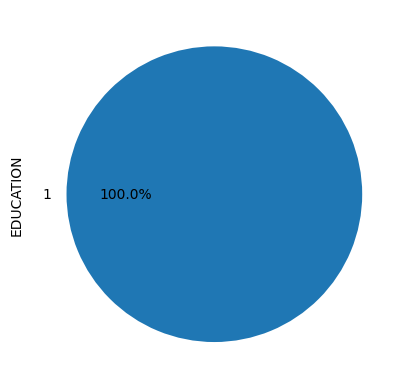

In [45]:
print(df.loc[(df['PAY_5']<=-0.5) & (df['AGE']<=40.5) & (df['PAY_2']<=-0.5) & (df['PAY_AMT3']>3815.5) & (df['BILL_AMT5']>36430.0) & (df['BILL_AMT1']<=34472.5) & (df['PAY_AMT5']<=34062.5) & (df['PAY_AMT1']>1475.0)]['EDUCATION'].value_counts())
df.loc[(df['PAY_5']<=-0.5) & (df['AGE']<=40.5) & (df['PAY_2']<=-0.5) & (df['PAY_AMT3']>3815.5) & (df['BILL_AMT5']>36430.0) & (df['BILL_AMT1']<=34472.5) & (df['PAY_AMT5']<=34062.5) & (df['PAY_AMT1']>1475.0)]['EDUCATION'].value_counts().plot(kind='pie',autopct='%1.1f%%')

0    36
1     3
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

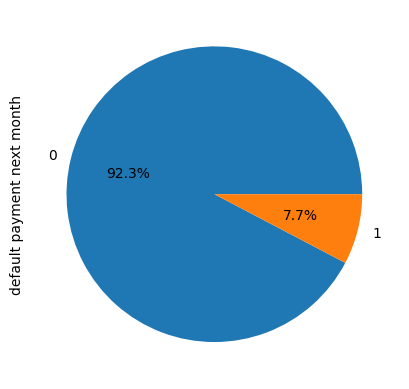

In [46]:
print(df.loc[(df['PAY_5']<=-0.5) & (df['AGE']<=40.5) & (df['PAY_2']<=-0.5) & (df['PAY_AMT3']>3815.5) & (df['BILL_AMT5']>36430.0) & (df['BILL_AMT1']<=34472.5) & (df['PAY_AMT5']<=34062.5) & (df['PAY_AMT1']>1475.0)]['default payment next month'].value_counts())
df.loc[(df['PAY_5']<=-0.5) & (df['AGE']<=40.5) & (df['PAY_2']<=-0.5) & (df['PAY_AMT3']>3815.5) & (df['BILL_AMT5']>36430.0) & (df['BILL_AMT1']<=34472.5) & (df['PAY_AMT5']<=34062.5) & (df['PAY_AMT1']>1475.0)]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [47]:
# p(y+|s0) -> p(1|Proxy)
p1 = len(df.loc[(df['PAY_5']<=-0.5) & (df['AGE']<=40.5) & (df['PAY_2']<=-0.5) & (df['PAY_AMT3']>3815.5) & (df['BILL_AMT5']>36430.0) & (df['BILL_AMT1']<=34472.5) & (df['PAY_AMT5']<=34062.5) & (df['PAY_AMT1']>1475.0) & (df['default payment next month']==1)]) / len(df.loc[(df['PAY_5']<=-0.5) & (df['AGE']<=40.5) & (df['PAY_2']<=-0.5) & (df['PAY_AMT3']>3815.5) & (df['BILL_AMT5']>36430.0) & (df['BILL_AMT1']<=34472.5) & (df['PAY_AMT5']<=34062.5) & (df['PAY_AMT1']>1475.0)])
#print(p1)
# p(y-|s1) -> p(0|!Proxy)
p2 = len(df.loc[((df['PAY_5']>-0.5) | (df['AGE']>40.5) | (df['PAY_2']>-0.5) | (df['PAY_AMT3']<=3815.5) | (df['BILL_AMT5']<=36430.0) | (df['BILL_AMT1']>34472.5) | (df['PAY_AMT5']>34062.5) | (df['PAY_AMT1']<=1475.0)) & (df['default payment next month']==0)]) / len(df.loc[((df['PAY_5']>-0.5) | (df['AGE']>40.5) | (df['PAY_2']>-0.5) | (df['PAY_AMT3']<=3815.5) | (df['BILL_AMT5']<=36430.0) | (df['BILL_AMT1']>34472.5) | (df['PAY_AMT5']>34062.5) | (df['PAY_AMT1']<=1475.0))])
#print(p2)
# p(y+|s1) -> p(1|!Proxy)
p3 = len(df.loc[((df['PAY_5']>-0.5) | (df['AGE']>40.5) | (df['PAY_2']>-0.5) | (df['PAY_AMT3']<=3815.5) | (df['BILL_AMT5']<=36430.0) | (df['BILL_AMT1']>34472.5) | (df['PAY_AMT5']>34062.5) | (df['PAY_AMT1']<=1475.0)) & (df['default payment next month']==1)]) / len(df.loc[((df['PAY_5']>-0.5) | (df['AGE']>40.5) | (df['PAY_2']>-0.5) | (df['PAY_AMT3']<=3815.5) | (df['BILL_AMT5']<=36430.0) | (df['BILL_AMT1']>34472.5) | (df['PAY_AMT5']>34062.5) | (df['PAY_AMT1']<=1475.0))])
#print(p3)
# p(y-|s0) -> p(0|Proxy)
p4 = len(df.loc[(df['PAY_5']<=-0.5) & (df['AGE']<=40.5) & (df['PAY_2']<=-0.5) & (df['PAY_AMT3']>3815.5) & (df['BILL_AMT5']>36430.0) & (df['BILL_AMT1']<=34472.5) & (df['PAY_AMT5']<=34062.5) & (df['PAY_AMT1']>1475.0) & (df['default payment next month']==0)]) / len(df.loc[(df['PAY_5']<=-0.5) & (df['AGE']<=40.5) & (df['PAY_2']<=-0.5) & (df['PAY_AMT3']>3815.5) & (df['BILL_AMT5']>36430.0) & (df['BILL_AMT1']<=34472.5) & (df['PAY_AMT5']<=34062.5) & (df['PAY_AMT1']>1475.0)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.293


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [48]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.347


## MARRIAGE

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


<AxesSubplot:ylabel='MARRIAGE'>

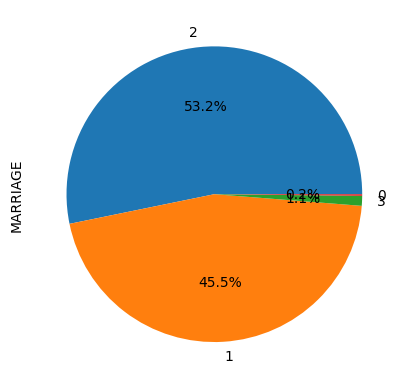

In [49]:
print(df['MARRIAGE'].value_counts())
df['MARRIAGE'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering MARRIAGE = 0

0    49
1     5
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

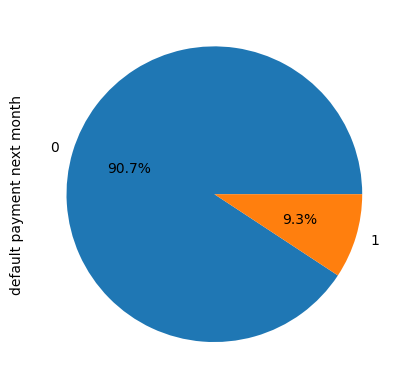

In [50]:
print(df.loc[df['MARRIAGE']==0]['default payment next month'].value_counts())
df.loc[df['MARRIAGE']==0]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering MARRIAGE = 1

0    10453
1     3206
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

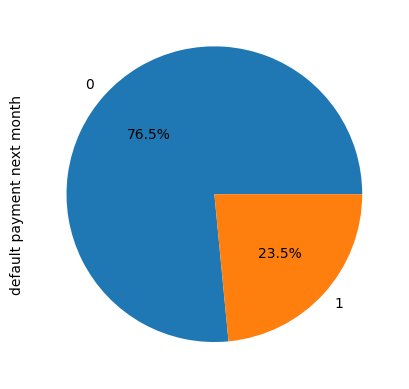

In [51]:
print(df.loc[df['MARRIAGE']==1]['default payment next month'].value_counts())
df.loc[df['MARRIAGE']==1]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering MARRIAGE = 2

0    12623
1     3341
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

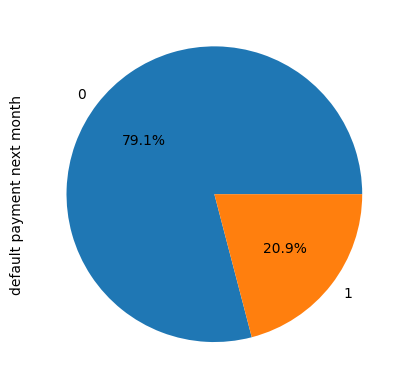

In [52]:
print(df.loc[df['MARRIAGE']==2]['default payment next month'].value_counts())
df.loc[df['MARRIAGE']==2]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering MARRIAGE = 3

0    239
1     84
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

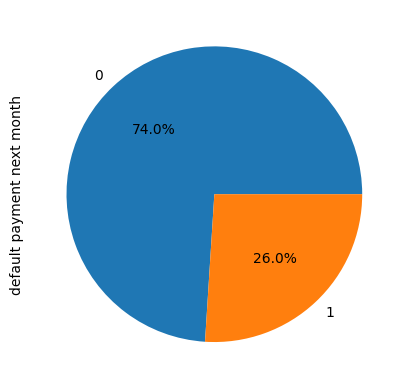

In [53]:
print(df.loc[df['MARRIAGE']==3]['default payment next month'].value_counts())
df.loc[df['MARRIAGE']==3]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = 0

let s1 = not 0

In [56]:
# p(y+|s0) -> p(1|0)
p1 = len(df.loc[(df['MARRIAGE']==0) & (df['default payment next month']==1)]) / len(df.loc[df['MARRIAGE']==0])
#print(p1)
# p(y-|s1) -> p(0|!0)
p2 = len(df.loc[(df['MARRIAGE']!=0) & (df['default payment next month']==0)]) / len(df.loc[df['MARRIAGE']!=0])
#print(p2)
# p(y+|s1) -> p(1|!0)
p3 = len(df.loc[(df['MARRIAGE']!=0) & (df['default payment next month']==1)]) / len(df.loc[df['MARRIAGE']!=0])
#print(p3)
# p(y-|s0) -> p(0|0)
p4 = len(df.loc[(df['MARRIAGE']==0) & (df['default payment next month']==0)]) / len(df.loc[df['MARRIAGE']==0])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.359


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = 0

let s1 = not 0

In [57]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.418


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = 1

let s1 = not 1

In [58]:
# p(y+|s0) -> p(1|1)
p1 = len(df.loc[(df['MARRIAGE']==1) & (df['default payment next month']==1)]) / len(df.loc[df['MARRIAGE']==1])
#print(p1)
# p(y-|s1) -> p(0|!1)
p2 = len(df.loc[(df['MARRIAGE']!=1) & (df['default payment next month']==0)]) / len(df.loc[df['MARRIAGE']!=1])
#print(p2)
# p(y+|s1) -> p(1|!1)
p3 = len(df.loc[(df['MARRIAGE']!=1) & (df['default payment next month']==1)]) / len(df.loc[df['MARRIAGE']!=1])
#print(p3)
# p(y-|s0) -> p(0|1)
p4 = len(df.loc[(df['MARRIAGE']==1) & (df['default payment next month']==0)]) / len(df.loc[df['MARRIAGE']==1])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.154


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = 1

let s1 = not 1

In [59]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.118


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = 2

let s1 = not 2

In [60]:
# p(y+|s0) -> p(1|2)
p1 = len(df.loc[(df['MARRIAGE']==2) & (df['default payment next month']==1)]) / len(df.loc[df['MARRIAGE']==2])
#print(p1)
# p(y-|s1) -> p(0|!2)
p2 = len(df.loc[(df['MARRIAGE']!=2) & (df['default payment next month']==0)]) / len(df.loc[df['MARRIAGE']!=2])
#print(p2)
# p(y+|s1) -> p(1|!2)
p3 = len(df.loc[(df['MARRIAGE']!=2) & (df['default payment next month']==1)]) / len(df.loc[df['MARRIAGE']!=2])
#print(p3)
# p(y-|s0) -> p(0|2)
p4 = len(df.loc[(df['MARRIAGE']==2) & (df['default payment next month']==0)]) / len(df.loc[df['MARRIAGE']==2])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.863


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = 2

let s1 = not 2

In [61]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.892


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = 3

let s1 = not 3

In [62]:
# p(y+|s0) -> p(1|3)
p1 = len(df.loc[(df['MARRIAGE']==3) & (df['default payment next month']==1)]) / len(df.loc[df['MARRIAGE']==3])
#print(p1)
# p(y-|s1) -> p(0|!3)
p2 = len(df.loc[(df['MARRIAGE']!=3) & (df['default payment next month']==0)]) / len(df.loc[df['MARRIAGE']!=3])
#print(p2)
# p(y+|s1) -> p(1|!3)
p3 = len(df.loc[(df['MARRIAGE']!=3) & (df['default payment next month']==1)]) / len(df.loc[df['MARRIAGE']!=3])
#print(p3)
# p(y-|s0) -> p(0|3)
p4 = len(df.loc[(df['MARRIAGE']==3) & (df['default payment next month']==0)]) / len(df.loc[df['MARRIAGE']==3])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.240


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = 3

let s1 = not 3

In [63]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.178


### Proxies

Most of the proxies found for race include (a combination of):
 - 


Best model (min depth) found with a node at depth 3 with 9 samples.

	** PAY_AMT2 > 5435.0 , BILL_AMT1 <= -5855.5 , PAY_AMT6 <= 15000.0 ,  #impurity: 0.0, #samples: 9.

Best model (max sample) found with 114 sample in a node at depth 7.

    ** AGE <= 33.5 , AGE <= 29.5 , BILL_AMT2 <= 18591.0 , PAY_AMT6 > 4894.5 , BILL_AMT4 <= 12528.5 , AGE <= 25.5 , PAY_AMT2 <= 8493.0 ,  #impurity: 0.0, #samples: 114.



For proxy: PAY_AMT2 > 5435.0 & BILL_AMT1 <= -5855.5 & PAY_AMT6 <= 15000.0

1    9
Name: MARRIAGE, dtype: int64


<AxesSubplot:ylabel='MARRIAGE'>

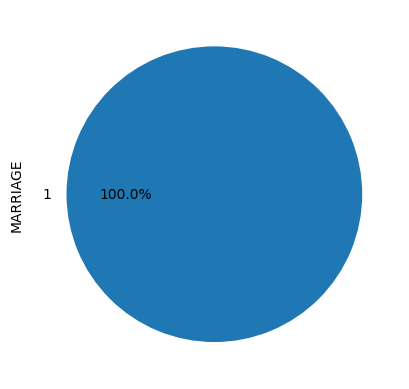

In [66]:
print(df.loc[(df['PAY_AMT2']>5435.0) & (df['BILL_AMT1']<=-5855.5) & (df['PAY_AMT6']<=15000.0)]['MARRIAGE'].value_counts())
df.loc[(df['PAY_AMT2']>5435.0) & (df['BILL_AMT1']<=-5855.5) & (df['PAY_AMT6']<=15000.0)]['MARRIAGE'].value_counts().plot(kind='pie',autopct='%1.1f%%')

0    9
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

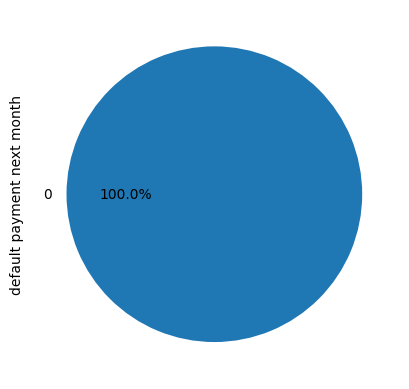

In [65]:
print(df.loc[(df['PAY_AMT2']>5435.0) & (df['BILL_AMT1']<=-5855.5) & (df['PAY_AMT6']<=15000.0)]['default payment next month'].value_counts())
df.loc[(df['PAY_AMT2']>5435.0) & (df['BILL_AMT1']<=-5855.5) & (df['PAY_AMT6']<=15000.0)]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [67]:
# p(y+|s0) -> p(1|Proxy)
p1 = len(df.loc[(df['PAY_AMT2']>5435.0) & (df['BILL_AMT1']<=-5855.5) & (df['PAY_AMT6']<=15000.0) & (df['default payment next month']==1)]) / len(df.loc[(df['PAY_AMT2']>5435.0) & (df['BILL_AMT1']<=-5855.5) & (df['PAY_AMT6']<=15000.0)])
#print(p1)
# p(y-|s1) -> p(0|!Proxy)
p2 = len(df.loc[((df['PAY_AMT2']<=5435.0) | (df['BILL_AMT1']>-5855.5) | (df['PAY_AMT6']>15000.0)) & (df['default payment next month']==0)]) / len(df.loc[((df['PAY_AMT2']<=5435.0) | (df['BILL_AMT1']>-5855.5) | (df['PAY_AMT6']>15000.0))])
#print(p2)
# p(y+|s1) -> p(1|!Proxy)
p3 = len(df.loc[((df['PAY_AMT2']<=5435.0) | (df['BILL_AMT1']>-5855.5) | (df['PAY_AMT6']>15000.0)) & (df['default payment next month']==1)]) / len(df.loc[((df['PAY_AMT2']<=5435.0) | (df['BILL_AMT1']>-5855.5) | (df['PAY_AMT6']>15000.0))])
#print(p3)
# p(y-|s0) -> p(0|Proxy)
p4 = len(df.loc[(df['PAY_AMT2']>5435.0) & (df['BILL_AMT1']<=-5855.5) & (df['PAY_AMT6']<=15000.0)]) / len(df.loc[(df['PAY_AMT2']>5435.0) & (df['BILL_AMT1']<=-5855.5) & (df['PAY_AMT6']<=15000.0)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.000


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [68]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.000


For proxy: BILL_AMT2 <= 18591.0 & PAY_AMT6 > 4894.5 & BILL_AMT4 <= 12528.5 & AGE <= 25.5 & PAY_AMT2 <= 8493.0

2    114
Name: MARRIAGE, dtype: int64


<AxesSubplot:ylabel='MARRIAGE'>

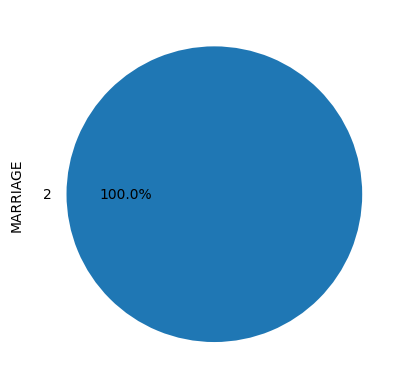

In [69]:
print(df.loc[(df['BILL_AMT2']<=18591.0) & (df['PAY_AMT6']>4894.5) & (df['BILL_AMT4']<=12528.5) & (df['AGE']<=25.5) & (df['PAY_AMT2']<=8493.0)]['MARRIAGE'].value_counts())
df.loc[(df['BILL_AMT2']<=18591.0) & (df['PAY_AMT6']>4894.5) & (df['BILL_AMT4']<=12528.5) & (df['AGE']<=25.5) & (df['PAY_AMT2']<=8493.0)]['MARRIAGE'].value_counts().plot(kind='pie',autopct='%1.1f%%')

0    94
1    20
Name: default payment next month, dtype: int64


<AxesSubplot:ylabel='default payment next month'>

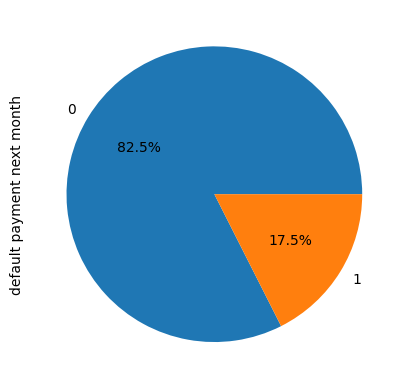

In [70]:
print(df.loc[(df['BILL_AMT2']<=18591.0) & (df['PAY_AMT6']>4894.5) & (df['BILL_AMT4']<=12528.5) & (df['AGE']<=25.5) & (df['PAY_AMT2']<=8493.0)]['default payment next month'].value_counts())
df.loc[(df['BILL_AMT2']<=18591.0) & (df['PAY_AMT6']>4894.5) & (df['BILL_AMT4']<=12528.5) & (df['AGE']<=25.5) & (df['PAY_AMT2']<=8493.0)]['default payment next month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [71]:
# p(y+|s0) -> p(1|Proxy)
p1 = len(df.loc[(df['BILL_AMT2']<=18591.0) & (df['PAY_AMT6']>4894.5) & (df['BILL_AMT4']<=12528.5) & (df['AGE']<=25.5) & (df['PAY_AMT2']<=8493.0) & (df['default payment next month']==1)]) / len(df.loc[(df['BILL_AMT2']<=18591.0) & (df['PAY_AMT6']>4894.5) & (df['BILL_AMT4']<=12528.5) & (df['AGE']<=25.5) & (df['PAY_AMT2']<=8493.0)])
#print(p1)
# p(y-|s1) -> p(0|!Proxy)
p2 = len(df.loc[((df['BILL_AMT2']>18591.0) | (df['PAY_AMT6']<=4894.5) | (df['BILL_AMT4']>12528.5) | (df['AGE']>25.5) | (df['PAY_AMT2']>8493.0)) & (df['default payment next month']==0)]) / len(df.loc[((df['BILL_AMT2']>18591.0) | (df['PAY_AMT6']<=4894.5) | (df['BILL_AMT4']>12528.5) | (df['AGE']>25.5) | (df['PAY_AMT2']>8493.0))])
#print(p2)
# p(y+|s1) -> p(1|!Proxy)
p3 = len(df.loc[((df['BILL_AMT2']>18591.0) | (df['PAY_AMT6']<=4894.5) | (df['BILL_AMT4']>12528.5) | (df['AGE']>25.5) | (df['PAY_AMT2']>8493.0)) & (df['default payment next month']==1)]) / len(df.loc[((df['BILL_AMT2']>18591.0) | (df['PAY_AMT6']<=4894.5) | (df['BILL_AMT4']>12528.5) | (df['AGE']>25.5) | (df['PAY_AMT2']>8493.0))])
#print(p3)
# p(y-|s0) -> p(0|Proxy)
p4 = len(df.loc[(df['BILL_AMT2']<=18591.0) & (df['PAY_AMT6']>4894.5) & (df['BILL_AMT4']<=12528.5) & (df['AGE']<=25.5) & (df['PAY_AMT2']<=8493.0) & (df['default payment next month']==0)]) / len(df.loc[(df['BILL_AMT2']<=18591.0) & (df['PAY_AMT6']>4894.5) & (df['BILL_AMT4']<=12528.5) & (df['AGE']<=25.5) & (df['PAY_AMT2']<=8493.0)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.748


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [72]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.792
